In [1]:
import sympy as sp
sp.init_printing()

from sympy import vector

S = vector.CoordSys3D('', vector_names=['r', "\\theta", r"\phi"],
                     variable_names=['r', "\\theta", r"\phi"])

## Problem 1.54
Check the divergence theorem for the function $$\mathbf{v} = r^2\cos\theta\,\hat{\mathbf{r}} + r^2\cos\phi \,\hat{\boldsymbol{\theta}} - r^2\cos\theta\sin\phi\,\hat{\boldsymbol{\phi}} $$ using as your volume one octant of the sphere of radius $R$. Make sure you include the *entire* surface. 

*[Answer: $\pi R^4/4 $]*

#### Solution:

In [2]:
v = S.x**2*sp.cos(S.y)*S.i + S.x**2*sp.cos(S.z)*S.j - S.x**2*sp.cos(S.y)*sp.sin(S.z)*S.k
v

In [3]:
r = S.x
theta = S.y
phi = S.z

vr = v.dot(S.i)
vtheta = v.dot(S.j)
vphi = v.dot(S.k)

divr = (1/r**2 * sp.diff(r**2*vr, r) + 
        1/(r*sp.sin(theta))*sp.diff(sp.sin(theta)*vtheta, theta) +
        1/(r*sp.sin(theta))*sp.diff(vphi, phi))
divr

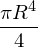

In [4]:
R = sp.symbols('R')

lhs = sp.integrate(sp.integrate(sp.integrate(divr*r**2*sp.sin(theta), 
                                             (r, 0, R)), 
                                (theta, 0, sp.pi/2)), 
                   (phi, 0, sp.pi/2))
lhs

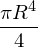

In [5]:
curvy = sp.integrate(sp.integrate((vr*r**2*sp.sin(theta)).subs(r, R), 
                                  (theta, 0, sp.pi/2)),
                     (phi, 0, sp.pi/2))
left = -sp.integrate(sp.integrate((vphi*r).subs(phi, 0), (r, 0, R)),
                     (theta, 0, sp.pi/2))
right = sp.integrate(sp.integrate((vphi*r).subs(phi, sp.pi/2), (r, 0, R)),
                     (theta, 0, sp.pi/2))
bottom = sp.integrate(sp.integrate((vtheta*r*sp.sin(theta)).subs(theta, sp.pi/2), 
                                   (r, 0, R)),
                     (phi, 0, sp.pi/2))



rhs = curvy + left + right + bottom
rhs

In [6]:
lhs == rhs


True

Because we will likely need to compute the divergence in spherical coordinates in the future, let's take a moment to write a function for it.

In [7]:
def div_spherical(vec):
    """Take the divergence in spherical coordinates.
    
    Works on a sympy.vector style vector.
    """
    
    # this was not obvious to me; required some source diving
    coordsys = list(vec.atoms(vector.CoordSys3D))[0]
    
    # to simplify notation
    r = coordsys.x
    theta = coordsys.y
    phi = coordsys.z
    
    rhat = coordsys.i
    thetahat = coordsys.j
    phihat = coordsys.k
    
    # from the inside cover of Griffiths
    divr = (1/r**2 * sp.diff(r**2*vec.dot(rhat), r) + 
        1/(r*sp.sin(theta))*sp.diff(sp.sin(theta)*vec.dot(thetahat), theta) +
        1/(r*sp.sin(theta))*sp.diff(vec.dot(phihat), phi))
    
    return divr

In [8]:
div_spherical(v)

## Problem 1.55
Check Stokes' theorem using the function $\mathbf{v} = ay\,\hat{\mathbf{x}} + bx\,\hat{\mathbf{y}}$ ($a$ and $b$ are constants) and the circular path of radius $R$, centered at the origin in the $xy$ plane. 

*[Answer: $\pi R^2(b-a)$]*

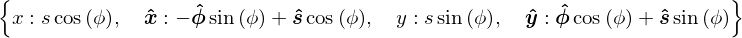

In [9]:
# cylindrical coordinates
s,phi = sp.symbols('s,phi')
x,y = sp.symbols('x,y')

xhat, yhat = sp.symbols('xhatbm,yhatbm')
phihat,shat = sp.symbols('phihatbm,shatbm')

coordeqs = [sp.Eq(x,s*sp.cos(phi)), sp.Eq(y,s*sp.sin(phi))]
uveqs = [sp.Eq(phihat, -sp.sin(phi)*xhat + sp.cos(phi)*yhat),
         sp.Eq(shat, sp.cos(phi)*xhat + sp.sin(phi)*yhat)]

xysubs = sp.solve(coordeqs + uveqs, [x,y,xhat,yhat])
xysubs

In [24]:
a,b = sp.symbols('a,b')
v = a*y*xhat + b*x*yhat
sp.collect(sp.expand(v.subs(xysubs)), (phihat, shat))


I've gotten to this point without using any of the different sets of machinery we've talked about for working with vectors. The negative consequence of that is that I now can't have `sympy` take dot products. The good news is, I don't really need to; I only need the $\hat{\boldsymbol{\phi}}$ term.

In [25]:
terms = sp.collect(sp.expand(v.subs(xysubs)), (phihat, shat), evaluate=False)
terms[phihat]

In [27]:
sp.simplify(sp.integrate((s*terms[phihat]).subs(s, R), (phi, 0, 2*sp.pi)))

## Problem 1.56
Compute the line integral of $$\mathbf{v} = 6 \,\hat{\mathbf{x}} + yz^2\,\hat{\mathbf{y}} + \left(3y+z\right)\,\hat{\mathbf{z}} $$ along the triangular path shown in figure 1.49. Check your answer using Stokes' theorem.

*[Answer: 8/3]*


## Problem 1.57
Compute the line integral of $$\mathbf{v} = \left(r\cos^2\theta\right)\,\hat{\mathbf{r}} - \left(r\cos\theta\sin\theta\right)\,\hat{\boldsymbol{\theta}} + 3r\,\hat{\boldsymbol{\phi}}$$ around the path shown in figure 1.50. Do it either in cylindrical or spherical coordinates. Check your answer using Stokes' theorem.

*[Answer: $3\pi/2$]*

In [28]:
from scipy.integrate import simps, trapz

In [29]:
help(simps)

Help on function simps in module scipy.integrate.quadrature:

simps(y, x=None, dx=1, axis=-1, even='avg')
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule.  If x is None, spacing of dx is assumed.
    
    If there are an even number of samples, N, then there are an odd
    number of intervals (N-1), but Simpson's rule requires an even number
    of intervals.  The parameter 'even' controls how this is handled.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : int, optional
        Spacing of integration points along axis of `y`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    even : str {'avg', 'first', 'last'}, optional
        'avg' : Average two results:1) use the first N-2 intervals with
                  a trapezoidal 